<img src="https://drive.google.com/uc?export=view&id=1x-QAgitB-S5rxGGDqxsJ299ZQTfYtOhb" width=180, align="center"/>

Master's degree in Intelligent Systems

Subject: 11754 - Deep Learning

Year: 2022-2023

Professor: Miguel Ángel Calafat Torrens

In [ ]:
# This cell connects to your drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Colab Notebooks/'
%ls -l

# Here the path of the project folder (which is where this file is) is inserted
# into the python path. There's nothing to do; just execute the cell.
import pathlib
import sys

PROJECT_DIR = str(pathlib.Path().resolve())
sys.path.append(PROJECT_DIR)

In [19]:
# Importing some libraries
import torch
from torch import nn
from torch import optim
import numpy as np
import matplotlib.pyplot as plt
import helper_PR3 as hp
from google.colab import files
from IPython.display import clear_output

In [20]:
# Random seed for reproducibility
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)

In [21]:
# This is a way to view the content of the help file without having to edit it
# in a new tab. You can also browse to it through the left bar.
files.view('helper_PR3.py')

<IPython.core.display.Javascript object>

In [22]:
# Define the global variable 'device' to be used where appropriate
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE)

cpu


# Problem 1

In the following exercises you will be supplied with a cloud of points and it is intended that you will be able to train **the simplest possible model that correctly classifies all the points**.

In this case it is only a question of classifying the training points, so don't worry about overfitting.


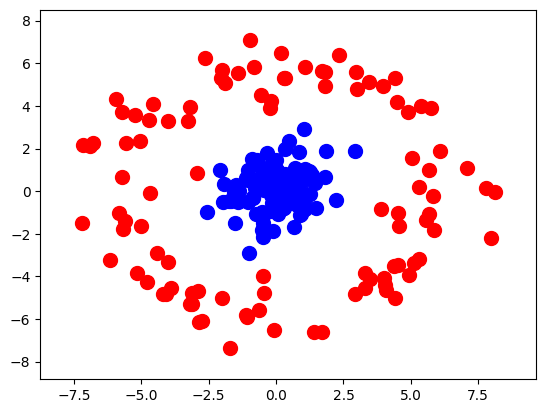

In [23]:
# Creation of a cloud of dots.

# Generate dots_bck test (background) and dots ground truth
dots_bck, dots_gt = hp.p_gen1(100)

# Create batches of 20 elements
inputs, labels = hp.batch_it(20, dots_gt)

# Visualization of the cloud
hp.my_plot(dots_gt, dots_gt)

### Training function

A training function is given to you, so you don't have to deal with it. You can just use it as in the example below

In [24]:
# Train function
def train(n_epochs, model, optimizer, criterion, inputs, labels, dots_tst,
          dots_gt, each=2): 
    """
    A training function with graphical info every "each" epochs.

    You don't have to tweak anything here. Just take into account the number
    of epochs and the "each" parameter when you call this function.
    """
    acum_loss = []
    model = model.to(DEVICE)
    for epoch in range(n_epochs):
        batch_loss = 0.0
        for Xb, Yb in zip(inputs, labels):
            Xb, Yb = Xb.to(DEVICE), Yb.to(DEVICE)
            # Training algorithm

            # Reset the gradients
            optimizer.zero_grad()

            # Forward pass
            Yp = model.forward(Xb)

            # Loss
            loss = criterion(Yp, Yb)

            # Backpropagation
            loss.backward()

            # Update weights
            optimizer.step()

            batch_loss += loss.item()
        
        # Loss log per epoch
        acum_loss.append(batch_loss)

        # Show results every "each" epochs.
        if epoch % each == 0:
            print('Epoch {}: loss = {}'.format(epoch, batch_loss))

            # The grid of points that make up the background is collected
            t_test_points = torch.from_numpy(dots_tst[:2, :].T).to(DEVICE)

            # The outputs of the model are calculated, both for the points that
            # make up the background and for the cloud of points to be
            # classified
            with torch.no_grad():
                model.eval()
                y_test = model.forward(t_test_points)
                y_tr_predict = (model.forward(inputs.reshape(-1, 2).to(
                    DEVICE)) >= 0.5).float()

            # Accuracy is calculated
            hp.acc(y_tr_predict, labels)

            # Transform tensors to np-arrays to be used in my_plot() function
            y_test = y_test.cpu().numpy().round().T
            test_block = np.concatenate((dots_tst[:2, :], y_test), axis=0)
            clear_output(wait=True)
            hp.my_plot(test_block, dots_gt)

            model.train()

    # Accuracy
    with torch.no_grad():
        model.eval()
        y_tr_predict = (model.forward(inputs.reshape(-1, 2).to(
            DEVICE)) >= 0.5).float()

    # Accuracy is calculated
    hp.acc(y_tr_predict, labels)

    return model, acum_loss

### Set up for training

At this point some start configuration is given to you, just as an example; but you will need to change it (at least the model) to reach the expected results.

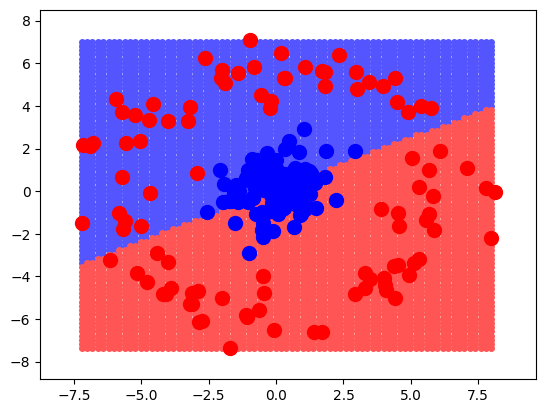

Acc: 53.0000


In [25]:
class Network_01(nn.Module):

    def __init__(self):
        super().__init__()
        # Dense layer
        self.fc1 = nn.Linear(in_features=2, out_features=1, bias=True)
        # Activation layer
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.fc1(x))
        return x

np.random.seed(SEED)
torch.manual_seed(SEED)

# Instanciate the model
model = Network_01()

# Instanciate the optimizer with the SGD algorithm (Stochastic Gradient Descent)
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Instanciate the loss function
criterion = nn.MSELoss()

# Simulation
model, _ = train(100, model, optimizer, criterion, inputs, labels, dots_bck,
          dots_gt, 2)

Now you see that the defined network is not complex enough to be able to correctly classify all the points.

First of all visit this [link](https://playground.tensorflow.org)

In the link above you will find a demo where you can define your custom neural network trying to fit it to different datasets. Play with it with the most similar dataset (the first one), to check what's your simplest network that can fit correctly.

Once you decide your network, define it (substitute the perceptron network given to you by your choice) and run the simulation again.

Feel free to tinker all the hiperparameters you need.

Hint: In the web simulation select:

* No regularization
* Problem type: Classification
* Discretize output: Enabled

## **Solution**

I have tested several models in the given link and I realize even if I have several layers of several neurons, I still cannot do a successful classification with sigmoid activation function. As it is seen in the following picture.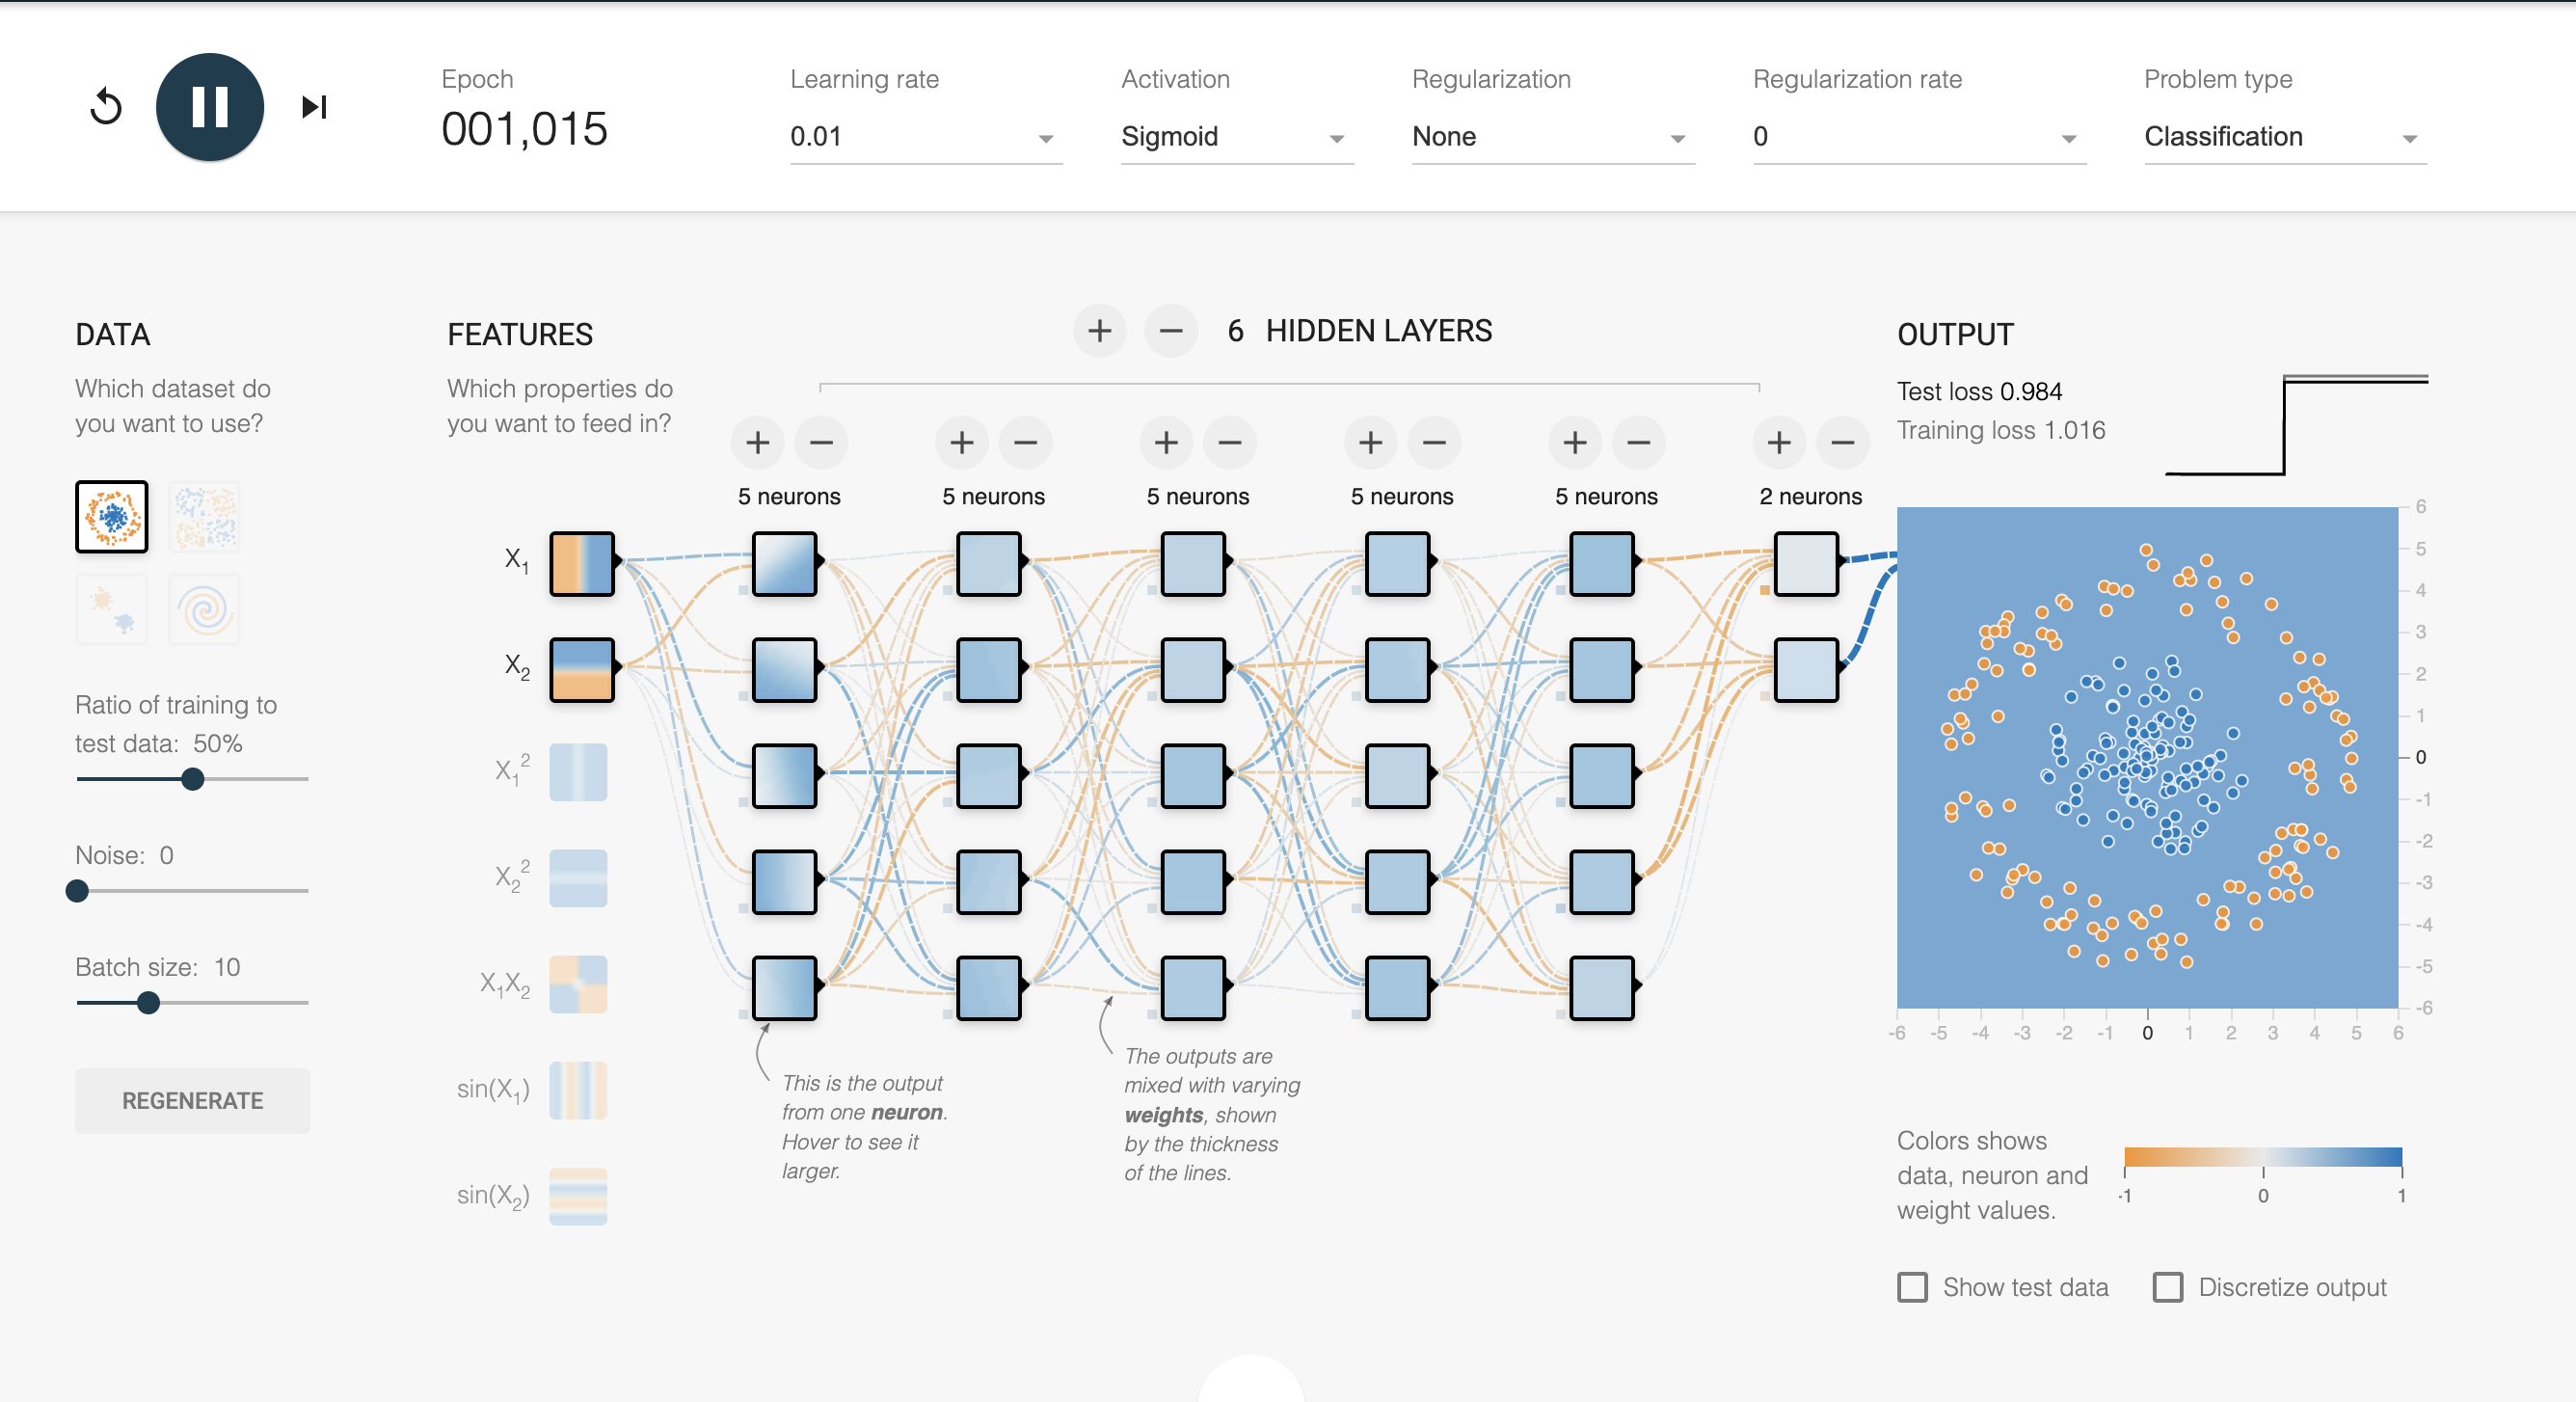


But if I use ReLU activation function I can have a successful classification with less number of neurons and layers. So I have added two hidden layers and ReLU activation functions to solve the problem

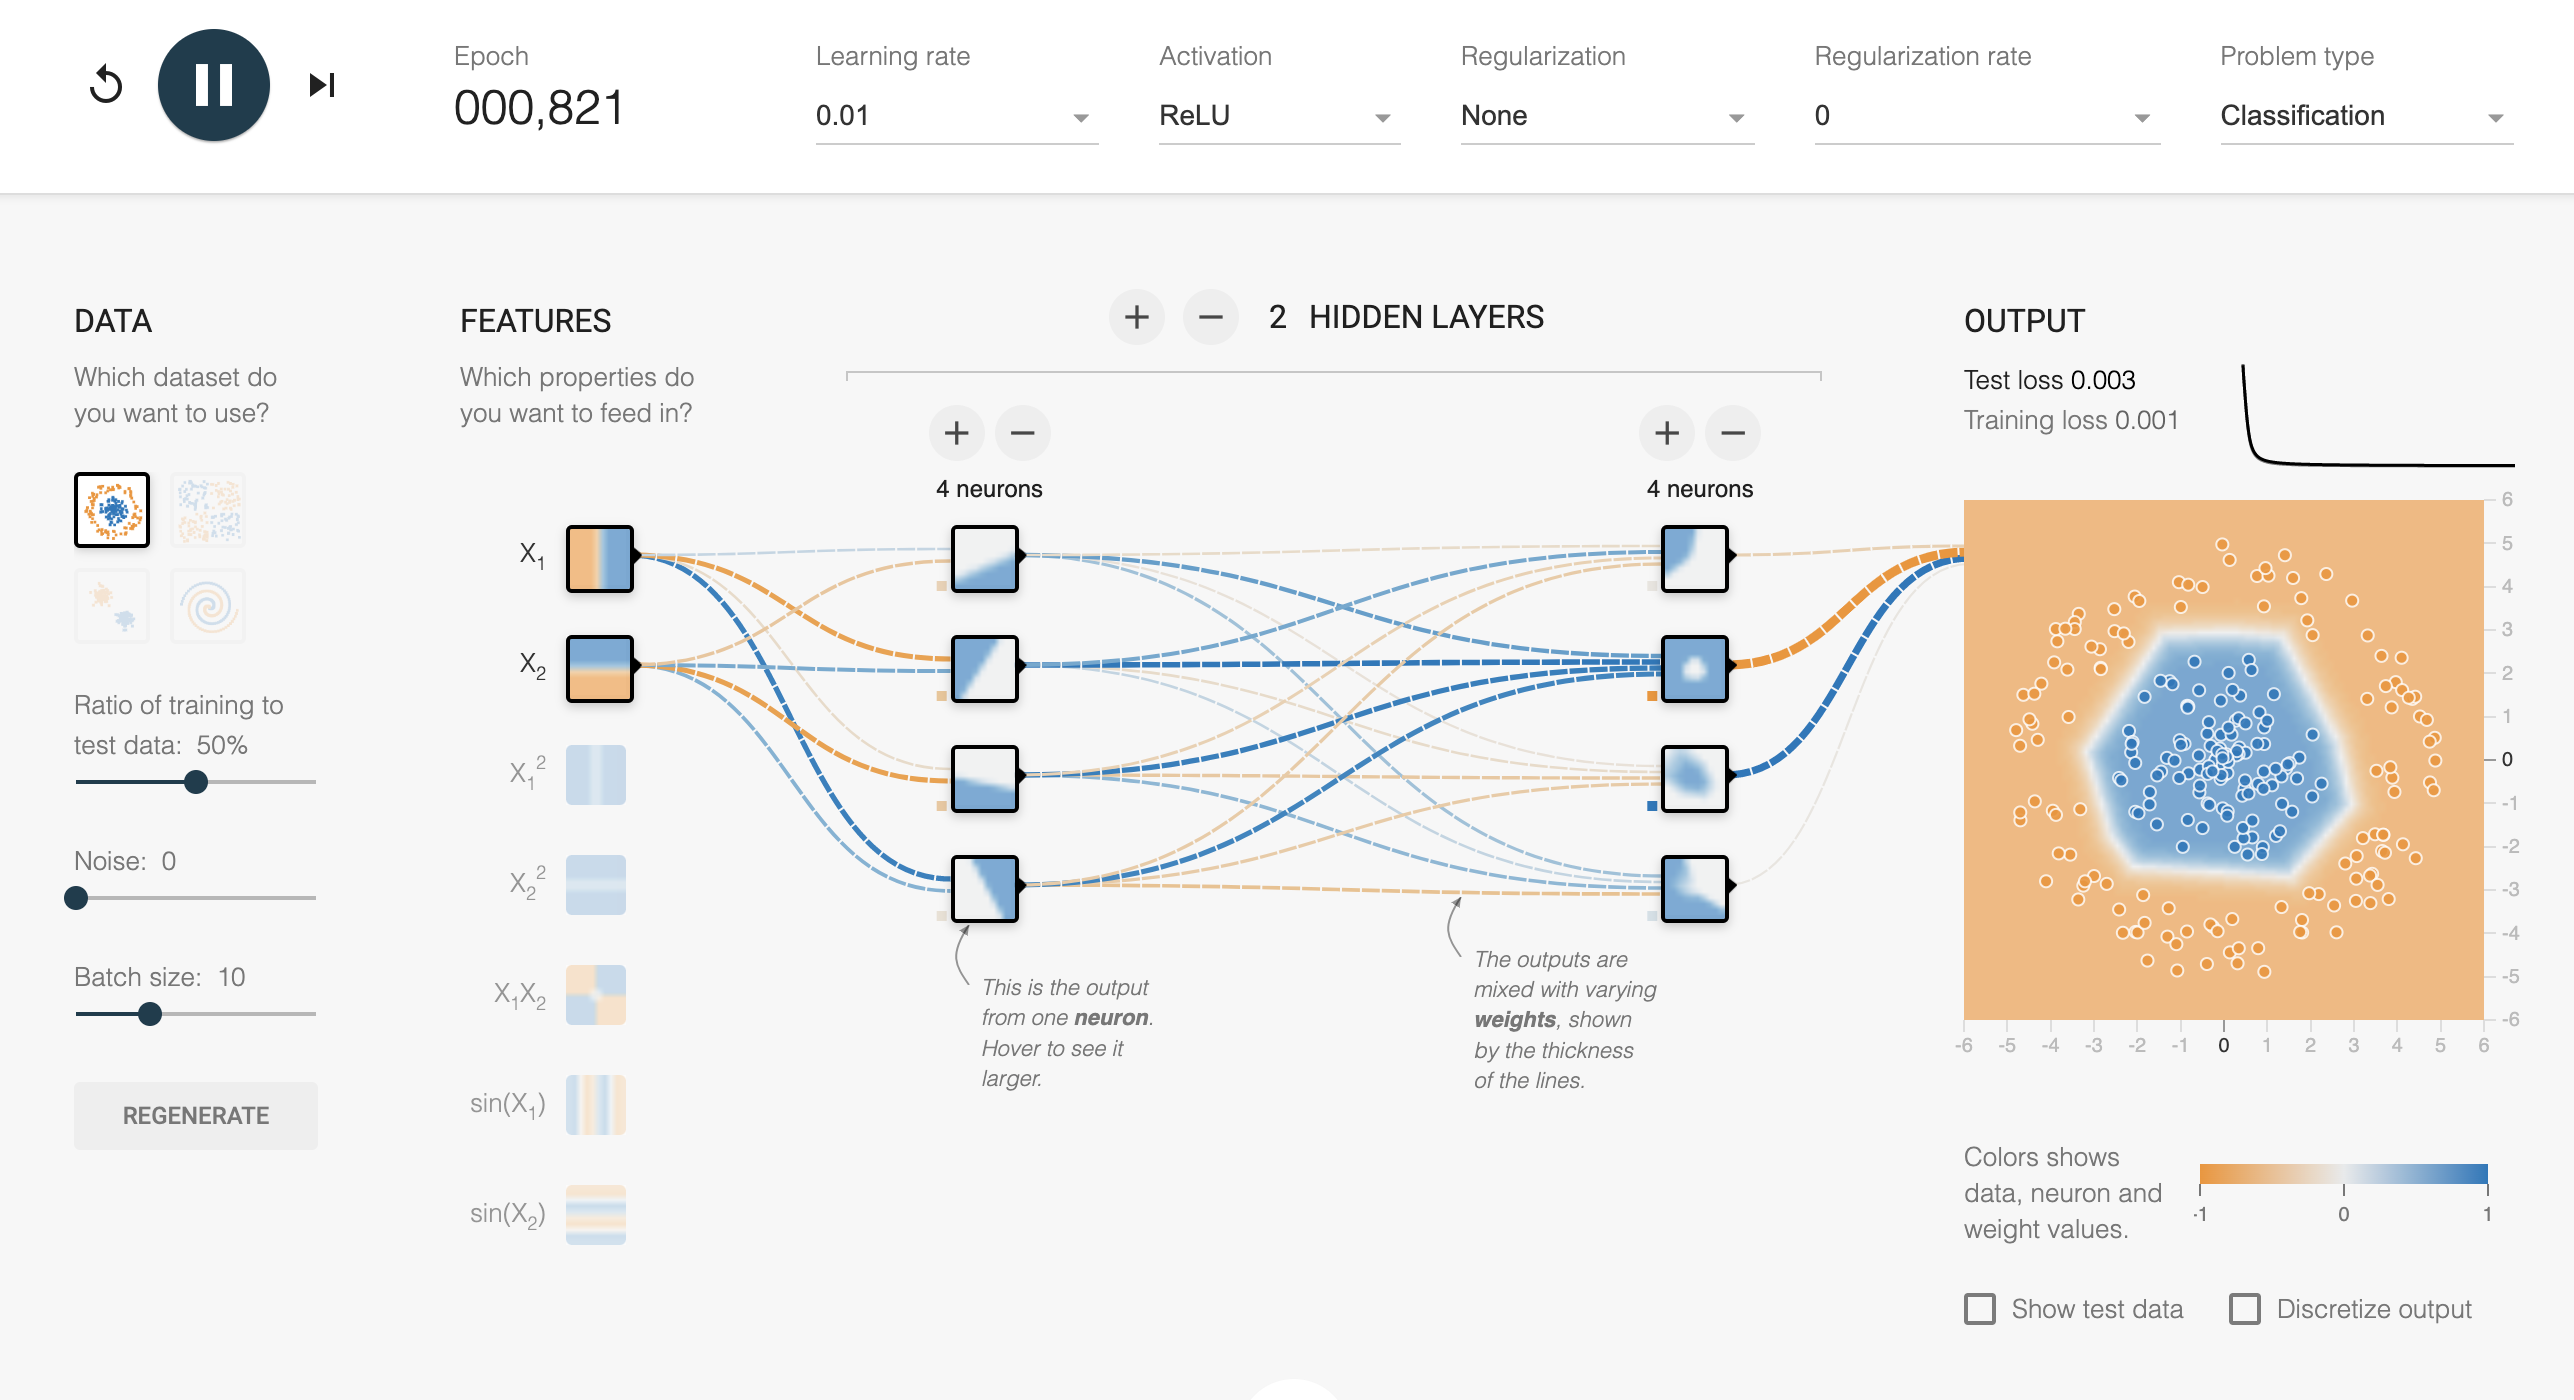

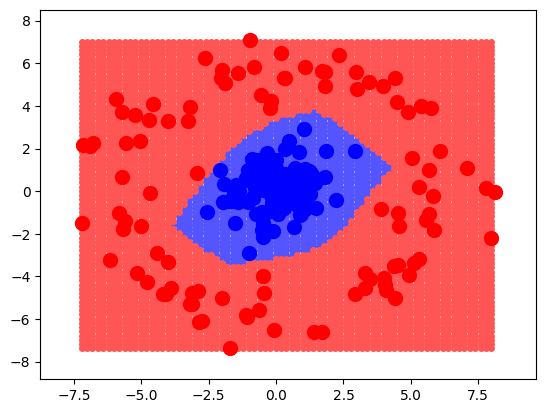

Acc: 100.0000


In [26]:
class Network_01(nn.Module):

    def __init__(self):
        super().__init__()

        # Defining the layers
        self.fc1 = nn.Linear(in_features=2, out_features=8)
        self.relu1 = nn.ReLU() # ReLU activation function
        self.fc2 = nn.Linear(in_features=8, out_features=8)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(in_features=8, out_features=1)
        self.relu3 = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        return x

np.random.seed(SEED)
torch.manual_seed(SEED)

# Instanciate the model
model = Network_01()

# Instanciate the optimizer with the SGD algorithm (Stochastic Gradient Descent)
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Instanciate the loss function
criterion = nn.MSELoss()

# Simulation
model, _ = train(100, model, optimizer, criterion, inputs, labels, dots_bck,
          dots_gt, 2)

# Problem 2

Repeat in the web the problem above with the rest of datasets. You just have to inform here the simplest model that correctly classifies all the points.

Note that you don't have to do anything here, since the datasets aren't given to you. Everything has to be done in the web. Here you have to show the results.

**Answer:**

a) The model of the problem 1  
b) The same model of the problem 1 and even with less number of neurons 2 layers of 3 neurons is enough.
<br>
c) A model with no hidden layers, only 2 neurons is enough
<br>
d) A model with 3 layers of 6 neurons and 4 input features

b)Screenshot
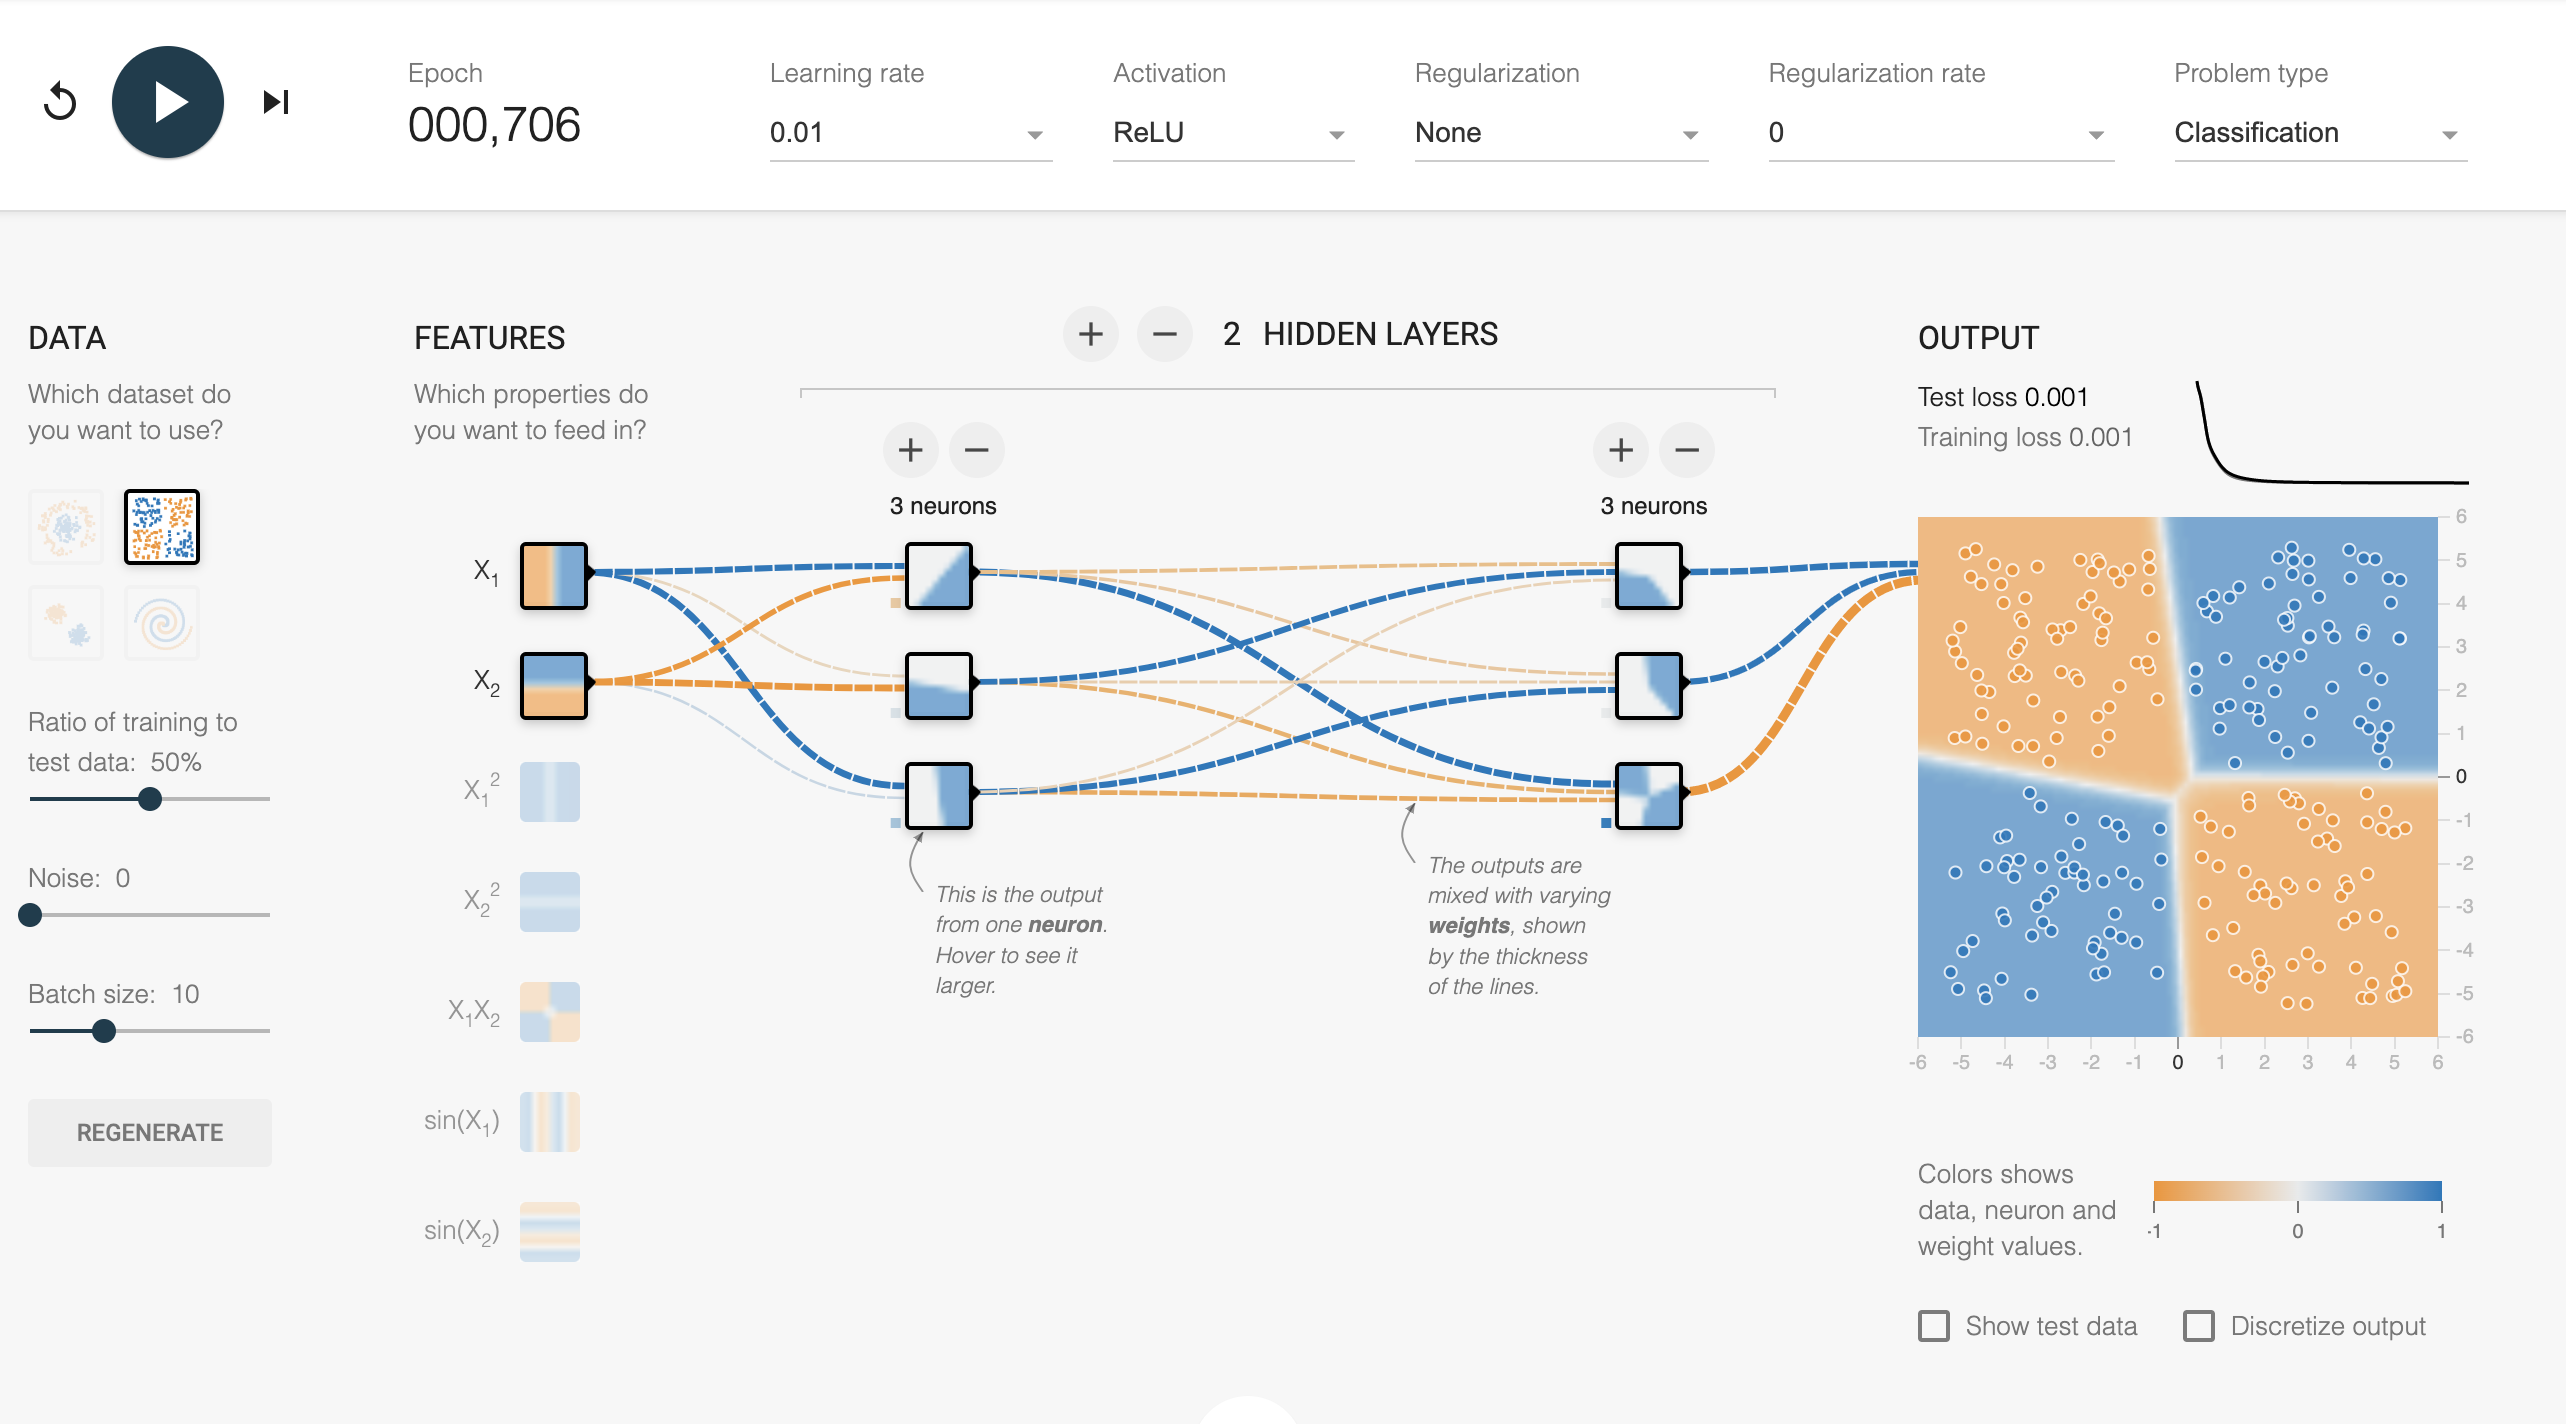

c)Screenshot
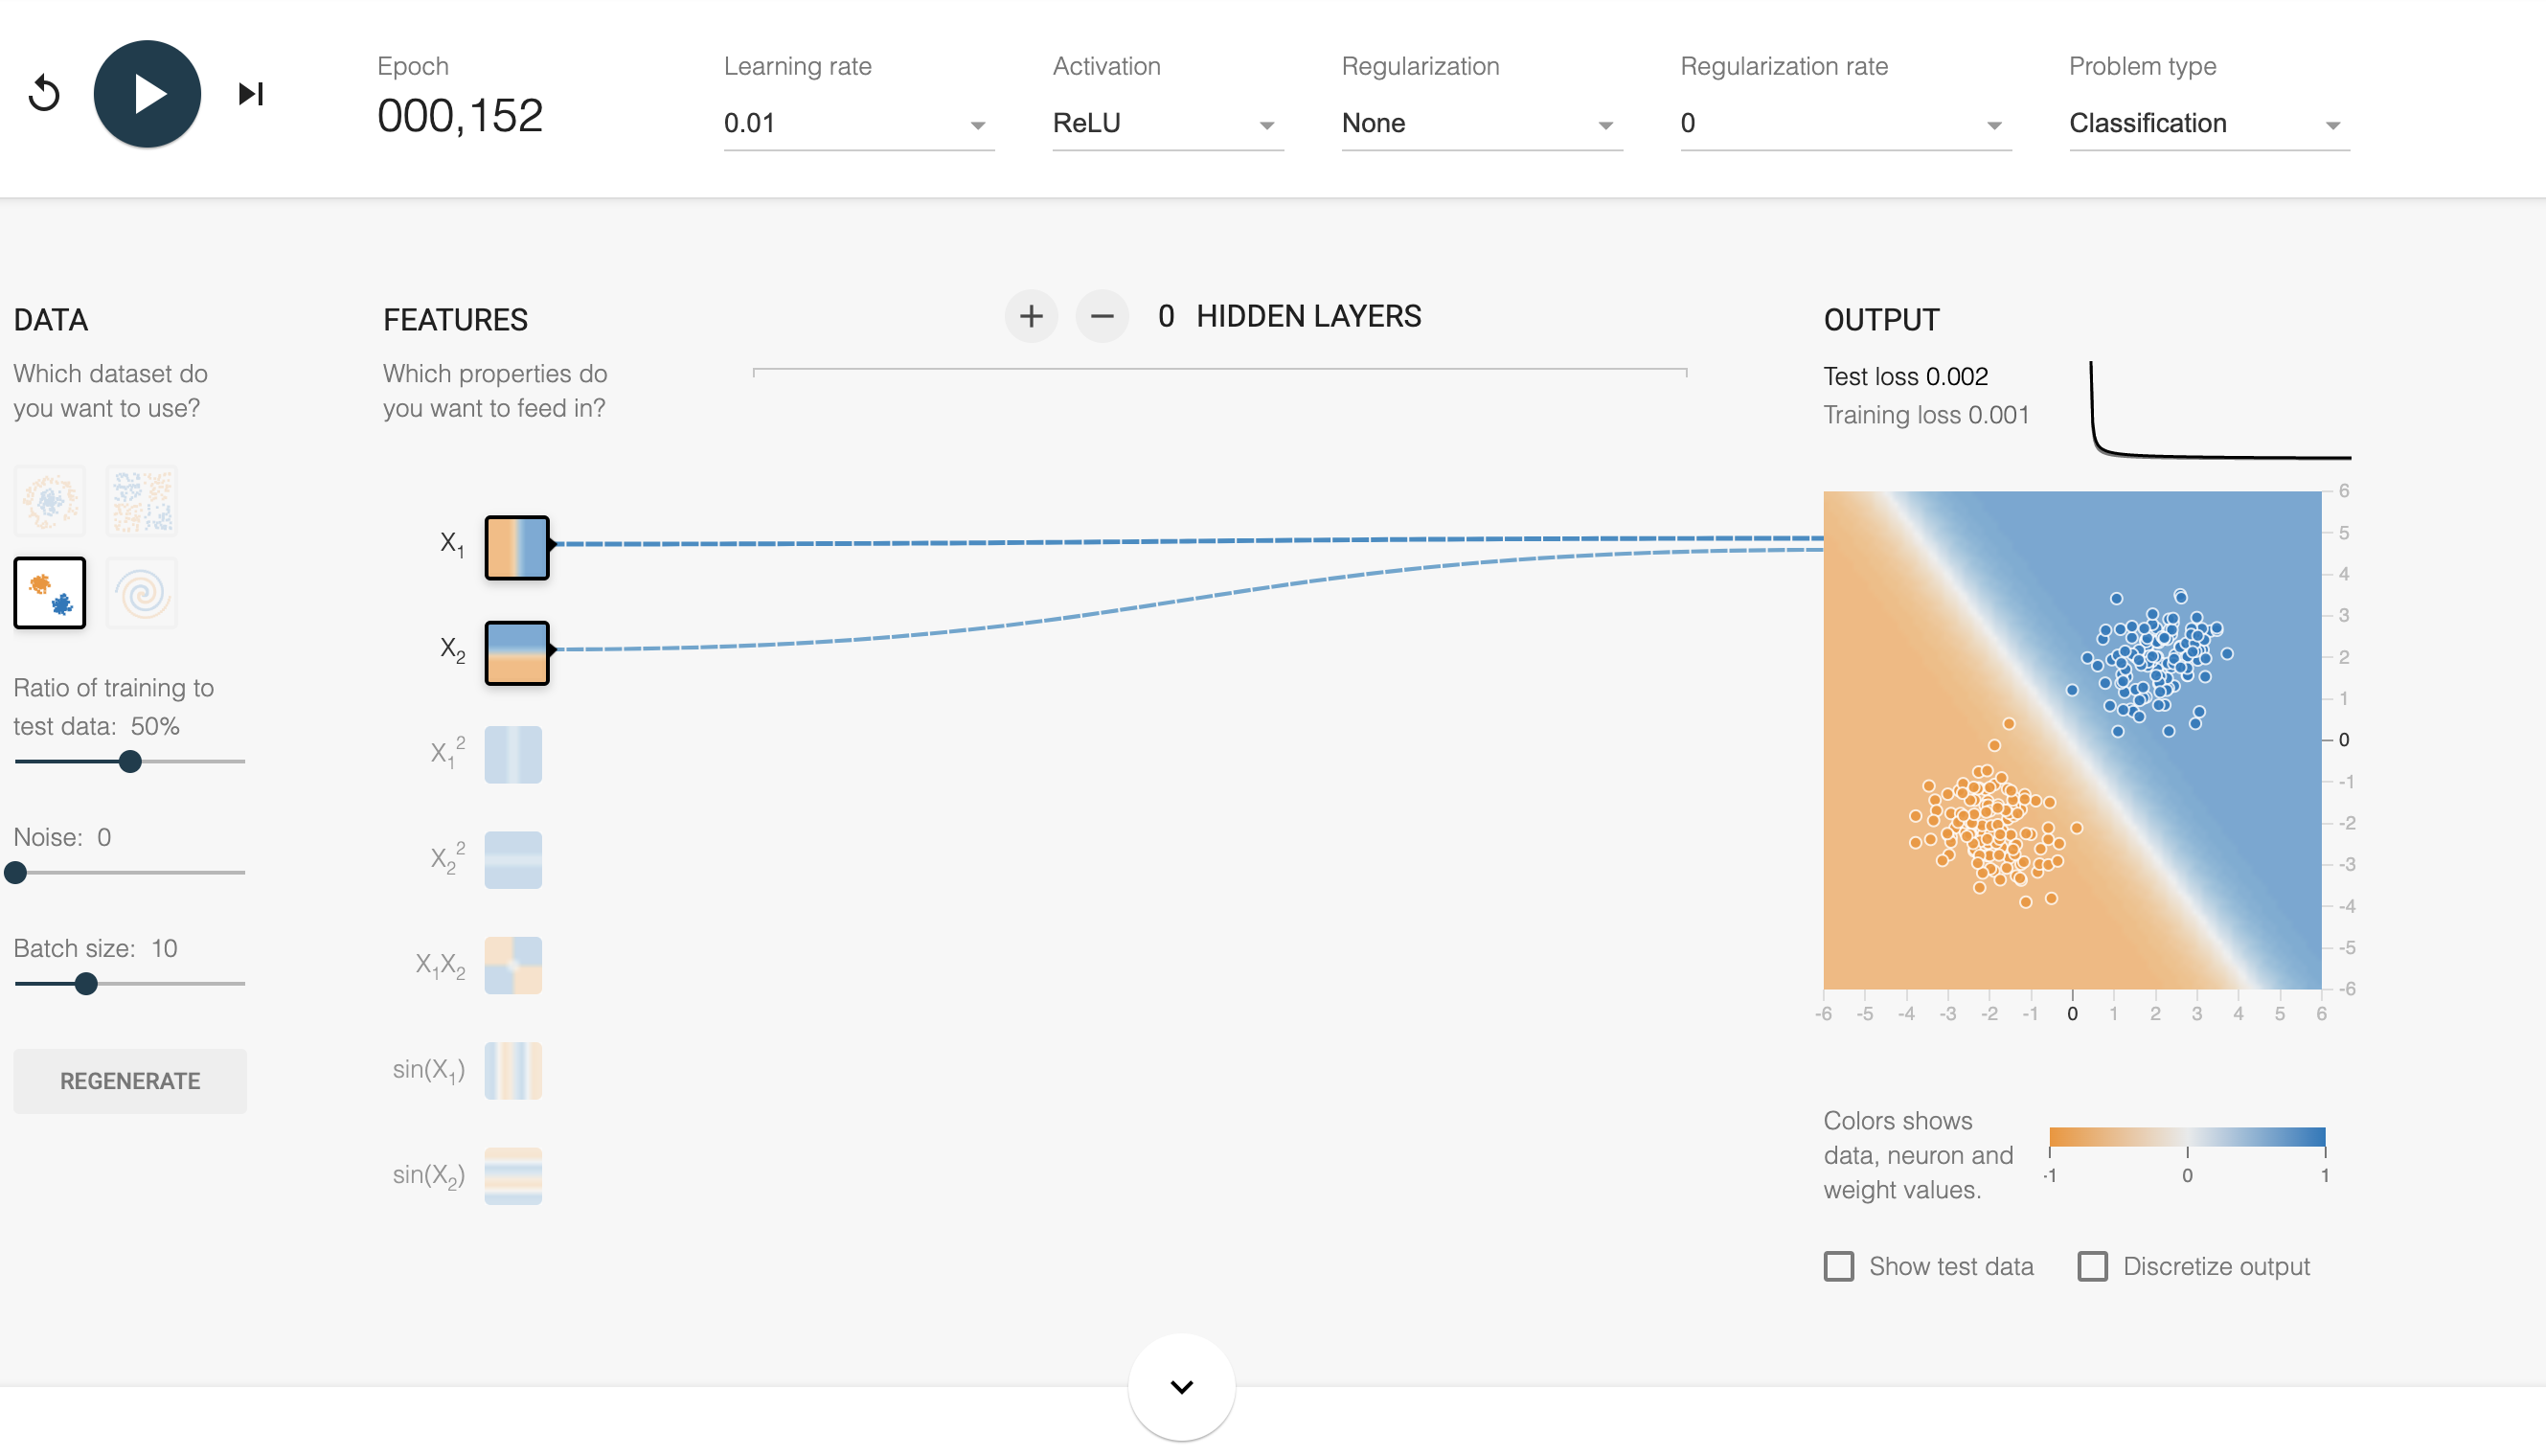

d)Screenshot
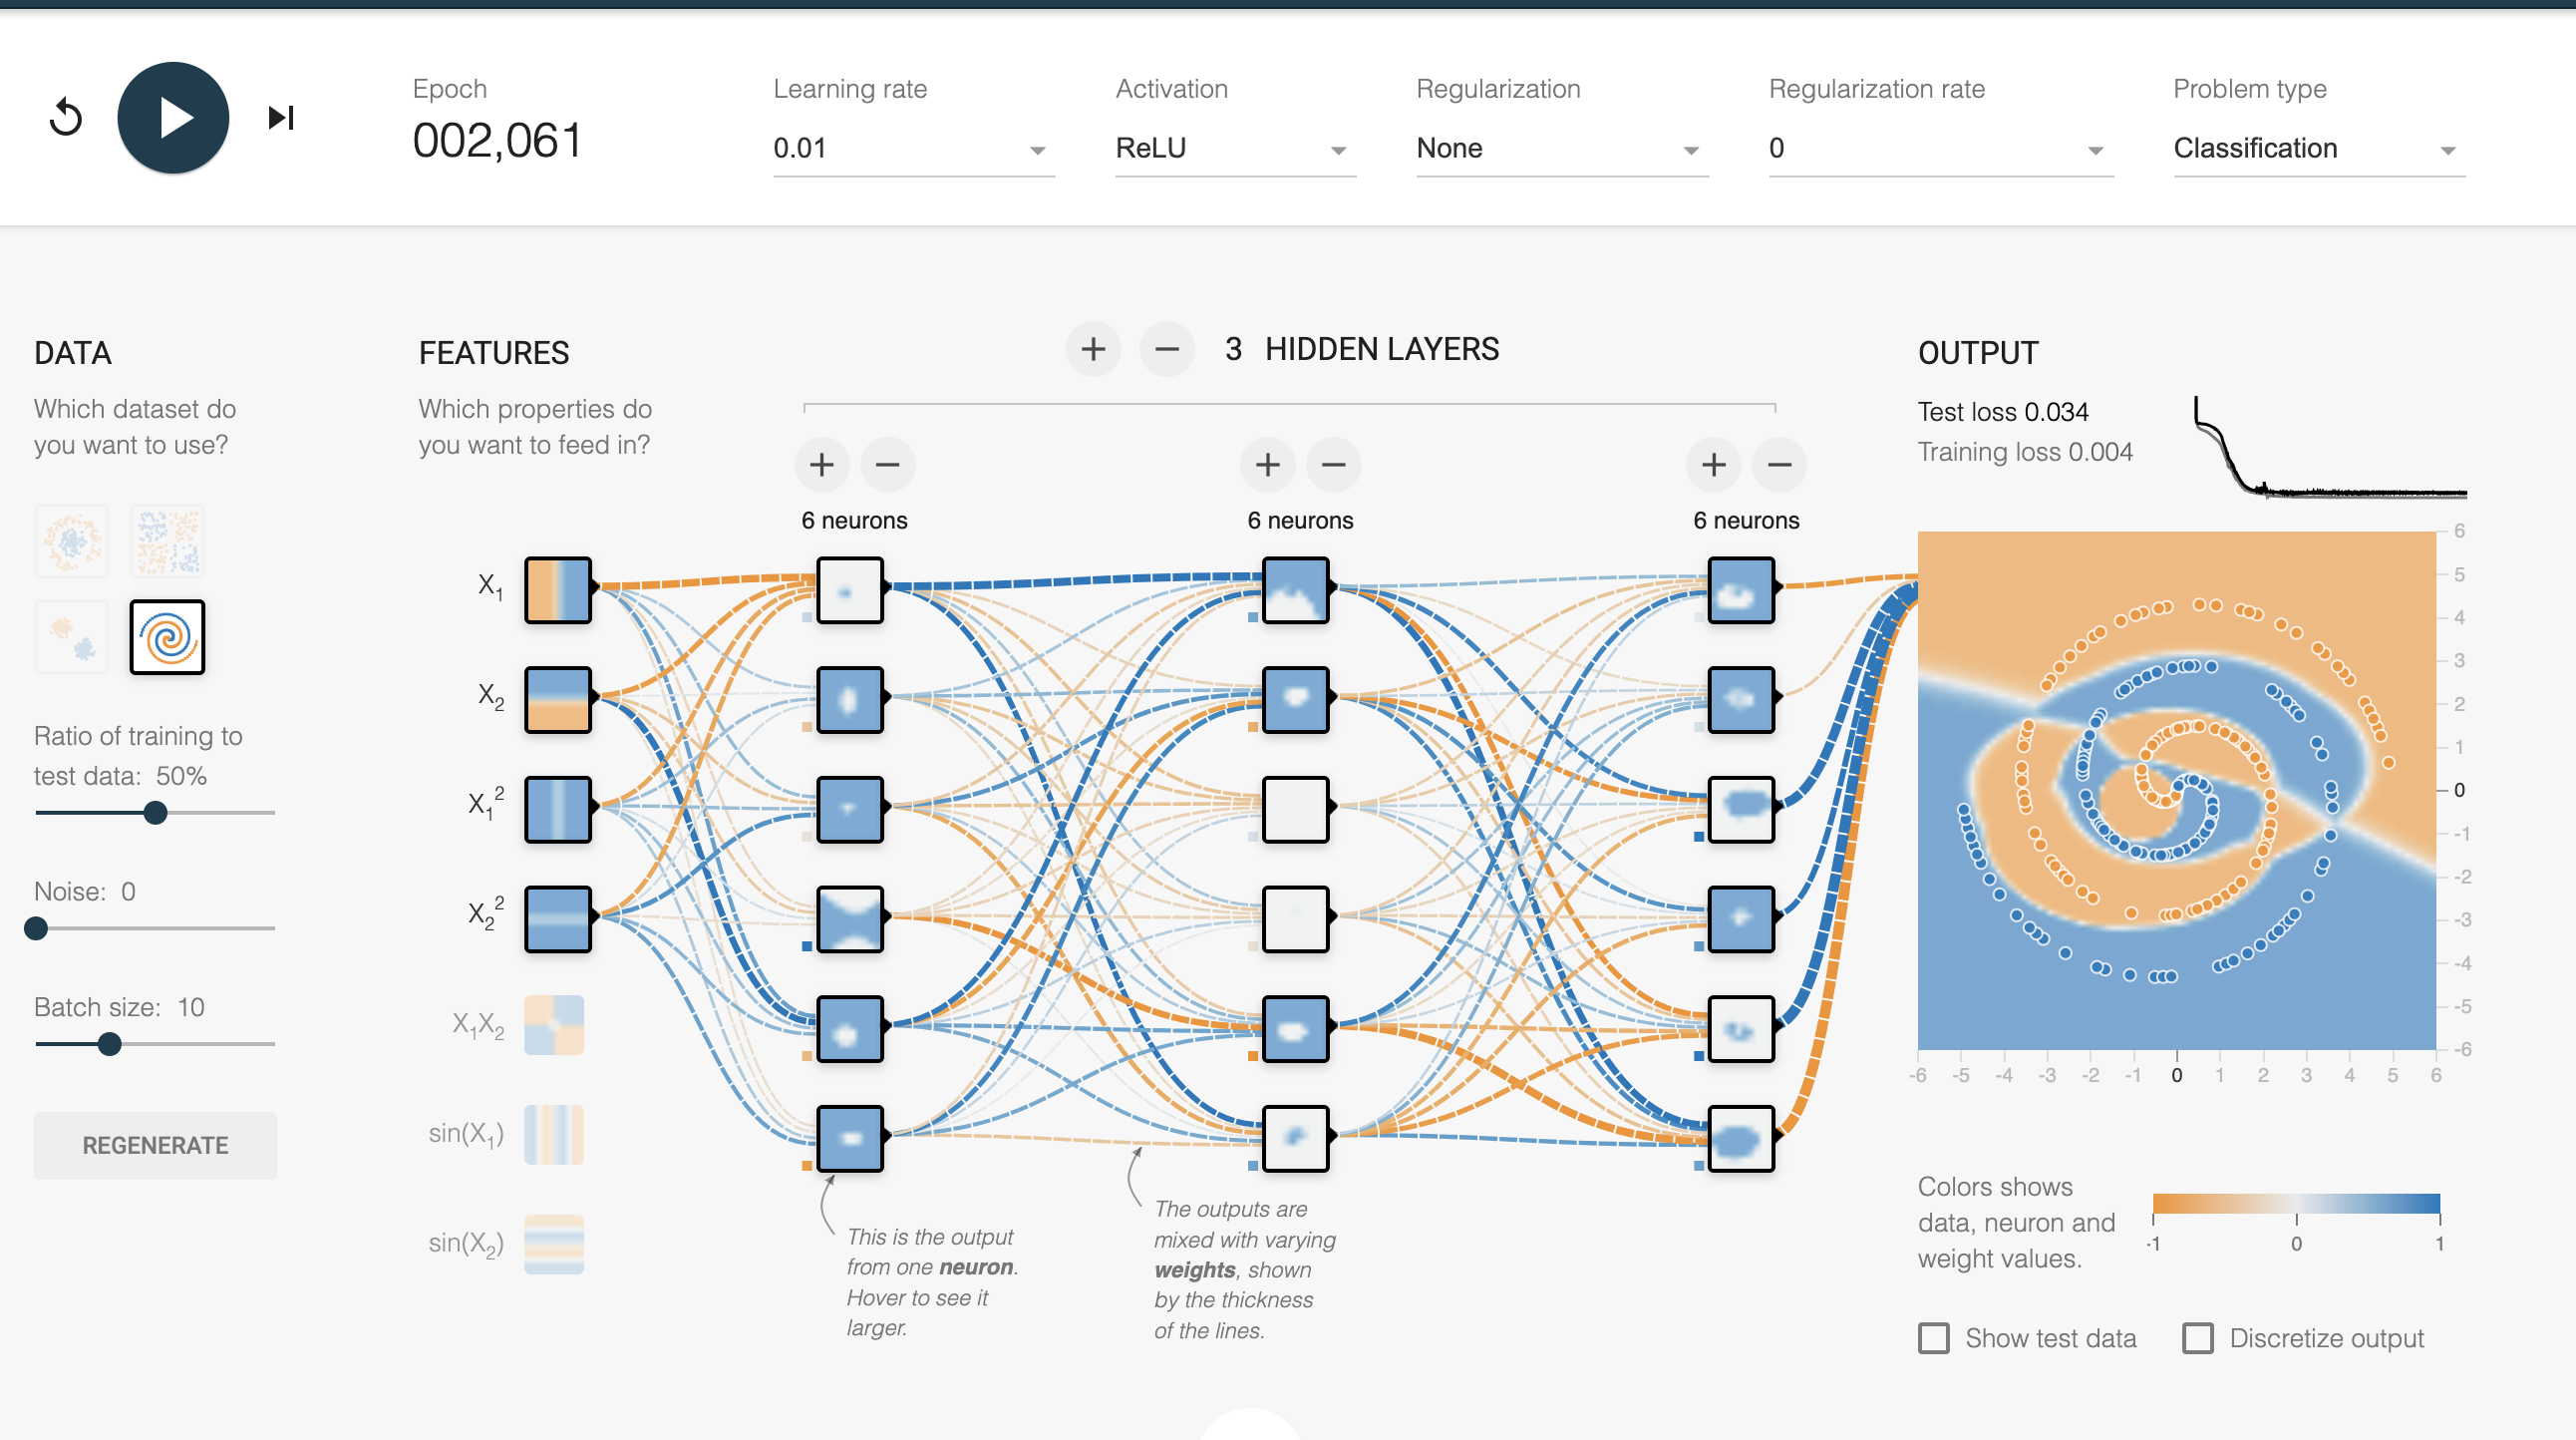

# Problem 3

Repeat the steps of problem 1 with the next cloud of points. In this case **you don't have to correctly classify all the points**; it is simply a matter of finding a network that you think classifies well enough without overfitting.

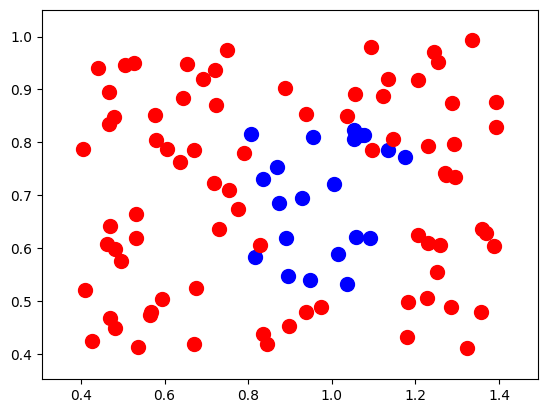

In [33]:
# Creation of a cloud of dots.

# Generate dots_bck test (background) and dots ground truth
dots_bck, dots_gt = hp.p_gen2(100)

# Create batches of 20 elements
inputs, labels = hp.batch_it(20, dots_gt)

# Visualization of the cloud
hp.my_plot(dots_gt, dots_gt)

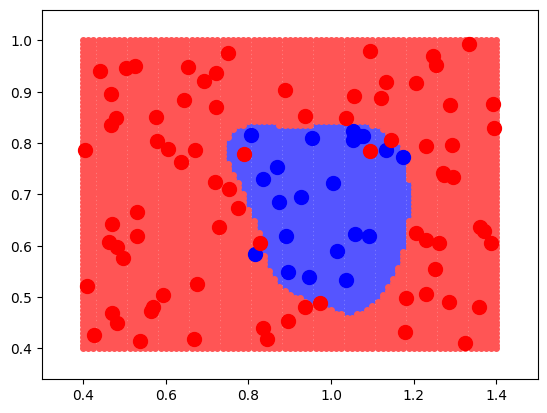

Acc: 95.0000


In [49]:
class Network_02(nn.Module):
    
    def __init__(self):
        super().__init__()
        # Start_________________________________________________________________
        # Defining the layers
        self.fc1 = nn.Linear(in_features=2, out_features=64)
        self.relu1 = nn.LeakyReLU() # LeakyReLU activation function
        self.bn1 = nn.BatchNorm1d(64) # Batch normalization layer
        self.fc2 = nn.Linear(in_features=64, out_features=128)
        self.relu2 = nn.ReLU()
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(in_features=128, out_features=64)
        self.relu3 = nn.ReLU()
        self.bn3 = nn.BatchNorm1d(64)
        self.fc4 = nn.Linear(in_features=64, out_features=32)
        self.relu4 = nn.ReLU()
        self.bn4 = nn.BatchNorm1d(32)
        self.fc5 = nn.Linear(in_features=32, out_features=1)
        self.sigmoid = nn.Sigmoid()
        # Start_________________________________________________________________
    
    def forward(self, x):
        # Start_________________________________________________________________
        x = self.bn1(self.relu1(self.fc1(x)))
        x = self.bn2(self.relu2(self.fc2(x)))
        x = self.bn3(self.relu3(self.fc3(x)))
        x = self.bn4(self.relu4(self.fc4(x)))
        x = self.sigmoid(self.fc5(x))
        # Start_________________________________________________________________
        return x

# Instanciate the model
model = Network_02()

# Instanciate the optimizer with the SGD algorithm (Stochastic Gradient Descent)
lr = 0.1
optimizer = optim.SGD(model.parameters(), lr=lr)

# Instanciate the loss function
criterion = nn.MSELoss()

# Simulation
n_epochs = 100
each = 2
model, _ = train(n_epochs, model, optimizer, criterion, inputs, labels, dots_bck,
          dots_gt, each)

A neural network model with five hidden layers followed by activation functions and batch normalization layers is developed.The input layer has two neurons since the input data has two features. The output layer has one neuron since the output is a binary classification result.


# Problem 4

Repeat the problem with the next dataset. In this case I want you to insanely overfit the model so it classifies correctly all the points. But don't forget to select the simplest model that can do the job.

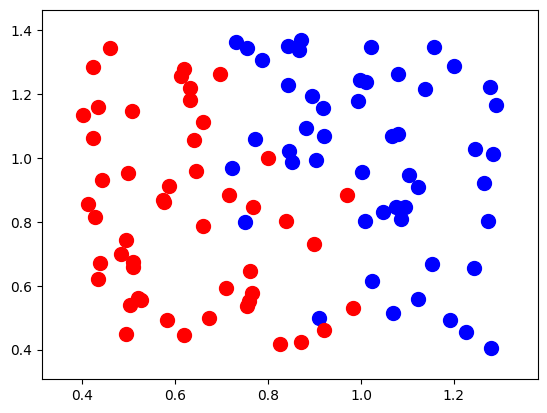

In [50]:
# Creation of a cloud of dots.

# Generate dots_bck test (background) and dots ground truth
dots_bck, dots_gt = hp.p_gen3(100)

# Create batches of 20 elements
inputs, labels = hp.batch_it(20, dots_gt)

# Visualization of the cloud
hp.my_plot(dots_gt, dots_gt)

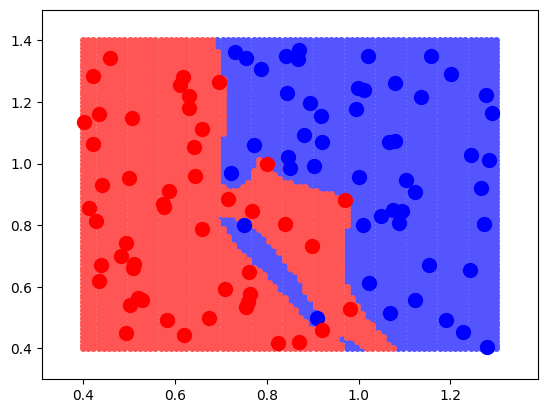

Acc: 100.0000


In [53]:
class Network_03(nn.Module):

    def __init__(self):
        super().__init__()
        # Start_________________________________________________________________
        self.fc1 = nn.Linear(in_features=2, out_features=64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(in_features=64, out_features=64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(in_features=64, out_features=64)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(in_features=64, out_features=64)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(in_features=64, out_features=64)
        self.relu5 = nn.ReLU()
        self.fc6 = nn.Linear(in_features=64, out_features=1)
        self.sigmoid = nn.Sigmoid()
        # End___________________________________________________________________

    def forward(self, x):
      # Start_________________________________________________________________
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.relu4(self.fc4(x))
        x = self.relu5(self.fc5(x))
        x = self.sigmoid(self.fc6(x))
        # End___________________________________________________________________
        return x
        

# Instanciate the model
model = Network_03()

# Instanciate the optimizer with the SGD algorithm (Stochastic Gradient Descent)
lr = 0.1
optimizer = optim.SGD(model.parameters(), lr=lr)

# Instanciate the loss function
criterion = nn.MSELoss()

# Simulation
n_epochs = 5000
each = 100
model, _ = train(n_epochs, model, optimizer, criterion, inputs, labels, dots_bck,
          dots_gt, each)

I have used a simple architecture with 5 hidden layers, each containing 64 neurons, and a sigmoid activation function in the output layer to classify the points. The learning rate is set to 0.01, and the model is trained for 5000 epochs with a checkpoint every 100 epochs. With this architecture and hyperparameters, the model is able to overfit the data and achieve perfect classification performance.